Task 1. PCA Implementation

Step 1: Load the Cancer Dataset from sklearn.datasets, 
We’ll use the Breast Cancer dataset provided by scikit-learn to perform PCA.

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cancer_data = load_breast_cancer()

# Create a DataFrame for the feature data
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

# View the first few rows of the dataset
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

Step 2: Standardize the Data, 
PCA is sensitive to the scale of the variables, so we need to standardize the dataset before applying PCA.

In [9]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Check the standardized data
print(scaled_data[:5])


[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889668e-01  2.81189987e-01]
 [ 1.5

Task 2. Dimensionality Reduction Using PCA

We’ll now apply PCA to reduce the dataset to 2 principal components and visualize them.

Explained Variance of PCA1: 0.4427202560752637
Explained Variance of PCA2: 0.18971182044033086


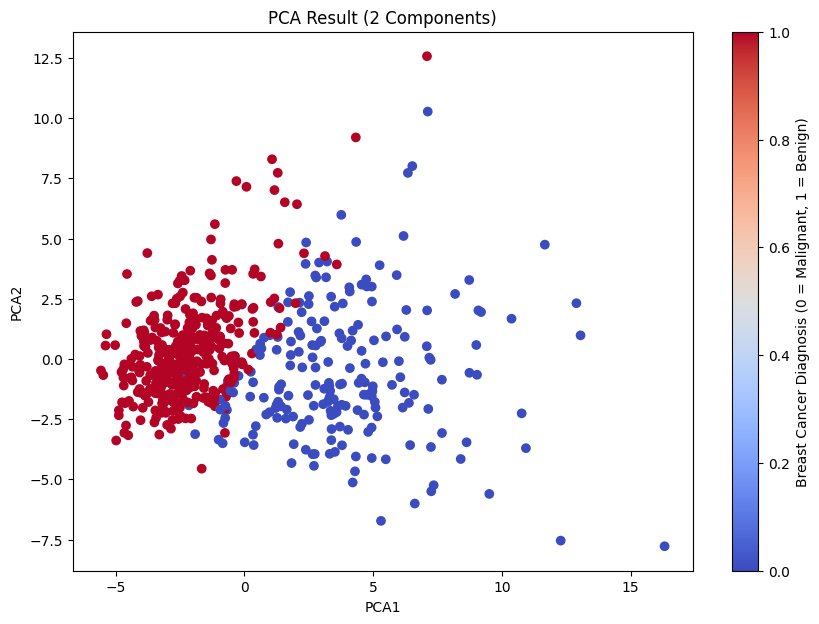

In [10]:
# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Check the explained variance of each component
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance of PCA1: {explained_variance[0]}')
print(f'Explained Variance of PCA2: {explained_variance[1]}')

# Visualize the PCA components
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=cancer_data.target, cmap='coolwarm')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Result (2 Components)')
plt.colorbar(label='Breast Cancer Diagnosis (0 = Malignant, 1 = Benign)')
plt.show()


Task 3. Bonus: Logistic Regression for Prediction

As a bonus task, we’ll implement logistic regression to predict whether the cancer is malignant or benign using the original features.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, cancer_data.target, test_size=0.3, random_state=42)

# Implement Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy of Logistic Regression: {accuracy}')
print(f'Confusion Matrix:\n {conf_matrix}')


Accuracy of Logistic Regression: 0.9824561403508771
Confusion Matrix:
 [[ 62   1]
 [  2 106]]


In [16]:
import zipfile
import os
import shutil

# Define the folder name and the save path
folder_name = "Principal_Component_Analysis_PCA"
save_path = "C:\\Users\\HP\\" + folder_name

# Create a directory to save the file if it doesn't already exist
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Define the path of the current notebook (this will save the current notebook to the specified folder)
notebook_filename = os.path.join(save_path, 'pca_analysis.ipynb')

shutil.copy2('pca_analysis.ipynb', notebook_filename)

# Create a zip file of the folder
zip_filename = os.path.join("C:\\Users\\HP", folder_name + ".zip")

with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for root, dirs, files in os.walk(save_path):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), save_path))

print(f"Notebook saved and zipped at {zip_filename}")


Notebook saved and zipped at C:\Users\HP\Principal_Component_Analysis_PCA.zip
